<a href="https://colab.research.google.com/github/so23acn/advanced_CS/blob/main/Healthcare_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd ## reading dataframe
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For plotting charts
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # Importing the RandomForestClassifier model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV to perform hyperparameter tuning
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score  # Importing various evaluation metrics
import warnings  # Warnings module is used to manage warnings in the code
warnings.filterwarnings("ignore")  # This line suppresses warnings to avoid clutter in the output

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.path.exists("/content/drive/MyDrive/healthcare_classification_dataset.csv")

Mounted at /content/drive


True

In [3]:
df = pd.read_csv("/content/drive/MyDrive/healthcare_classification_dataset.csv")
df

,Age,BloodPressure,HeartRate,Cholesterol,Glucose,BMI,Smoking,Disease
0,69,164,88,290,110,30.7,0,0
1,32,142,112,216,139,38.9,0,0
2,89,151,105,289,100,31.4,0,0
3,78,82,93,242,86,21.7,0,1
4,38,107,93,244,124,18.7,1,0
...,...,...,...,...,...,...,...,...
9995,88,117,91,218,139,34.9,0,0
9996,43,132,79,193,84,30.7,0,1
9997,63,166,63,293,79,26.8,0,0
9998,63,156,92,299,88,32.8,1,1


In [4]:
# Show info about data types, memory usage, and non-null values
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10000 non-null  int64  
 1   BloodPressure  10000 non-null  int64  
 2   HeartRate      10000 non-null  int64  
 3   Cholesterol    10000 non-null  int64  
 4   Glucose        10000 non-null  int64  
 5   BMI            10000 non-null  float64
 6   Smoking        10000 non-null  int64  
 7   Disease        10000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 625.1 KB
None


In [5]:
# Show summary statistics (mean, std, min, max, etc.)
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Age  BloodPressure     HeartRate   Cholesterol       Glucose  \
count  10000.000000   10000.000000  10000.000000  10000.000000  10000.000000   
mean      53.539700     129.306200     89.540500    224.627000    134.252000   
std       20.757324      28.779716     17.306655     42.963492     37.818325   
min       18.000000      80.000000     60.000000    150.000000     70.000000   
25%       36.000000     104.000000     75.000000    187.000000    101.000000   
50%       53.000000     129.000000     90.000000    225.000000    134.000000   
75%       72.000000     154.000000    105.000000    262.000000    167.000000   
max       89.000000     179.000000    119.000000    299.000000    199.000000   

                BMI      Smoking       Disease  
count  10000.000000  10000.00000  10000.000000  
mean      29.184450      0.50590      0.504100  
std        6.244722      0.49999      0.500008  
min       18.500000      0.00000      0.000000  
25%       23.

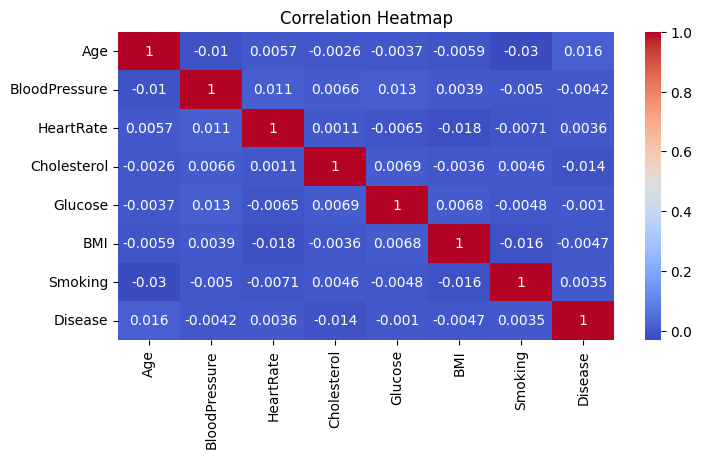

In [6]:
plt.figure(figsize=(8,4))  # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Plot the correlation matrix
plt.title("Correlation Heatmap")  # Set the title
plt.show()  # Display the plot


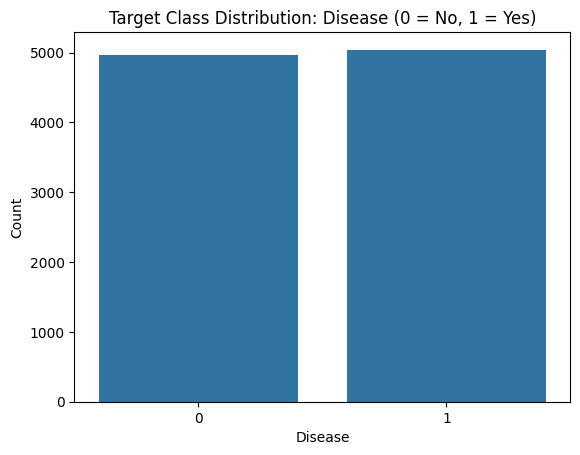

In [7]:
sns.countplot(x='Disease', data=df)  # Count of 0s and 1s in the target column
plt.title("Target Class Distribution: Disease (0 = No, 1 = Yes)")  # Add title
plt.xlabel("Disease")  # Label X-axis
plt.ylabel("Count")  # Label Y-axis
plt.show()  # Show the plot


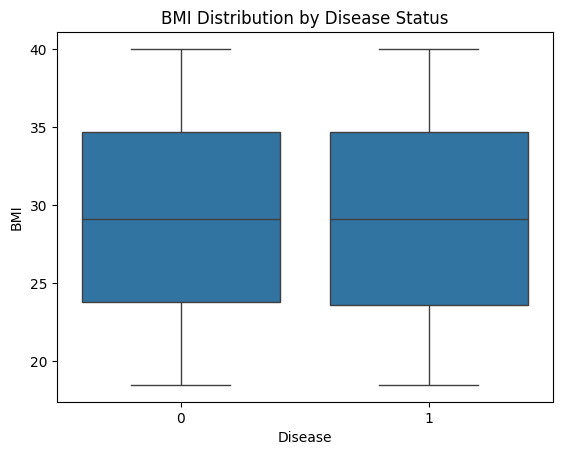

In [8]:
sns.boxplot(x='Disease', y='BMI', data=df)  # Boxplot of BMI across Disease categories
plt.title("BMI Distribution by Disease Status")  # Add title
plt.xlabel("Disease")  # Label X-axis
plt.ylabel("BMI")  # Label Y-axis
plt.show()  # Display the plot


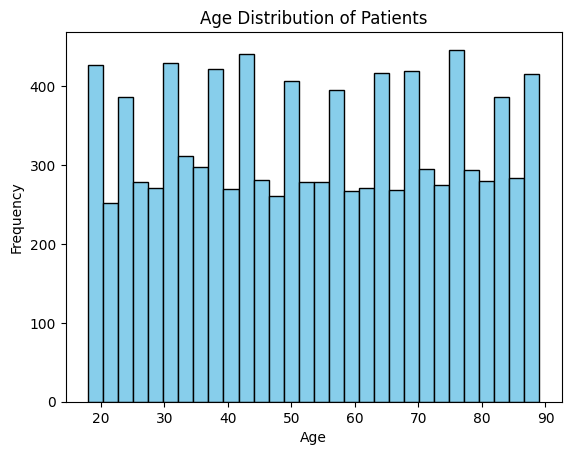

In [9]:
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')  # Histogram for Age
plt.title("Age Distribution of Patients")  # Add title
plt.xlabel("Age")  # Label X-axis
plt.ylabel("Frequency")  # Label Y-axis
plt.show()  # Display the plot


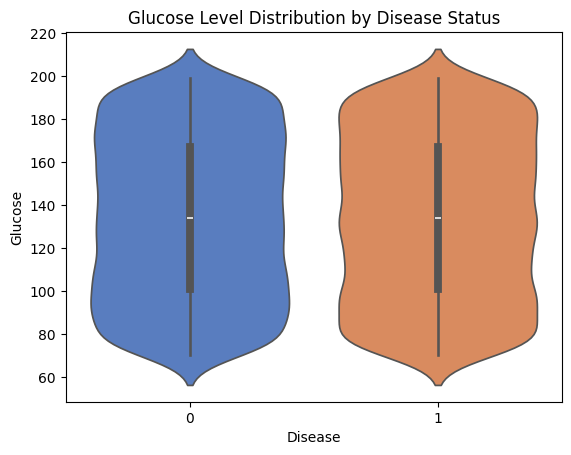

In [10]:
sns.violinplot(x='Disease', y='Glucose', data=df, palette="muted")  # Violin plot
plt.title("Glucose Level Distribution by Disease Status")  # Add title
plt.xlabel("Disease")  # Label X-axis
plt.ylabel("Glucose")  # Label Y-axis
plt.show()  # Show the plot


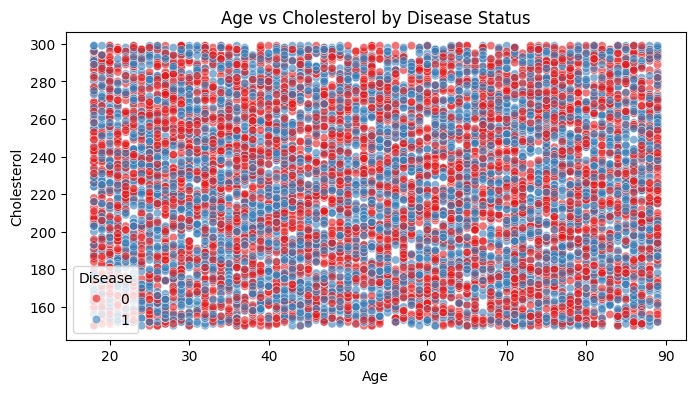

In [11]:
# Scatter plot of Age vs Cholesterol with color indicating Disease
plt.figure(figsize=(8,4))  # Set figure size
sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='Disease', palette='Set1', alpha=0.6)
plt.title("Age vs Cholesterol by Disease Status")  # Add title
plt.xlabel("Age")  # Label X-axis
plt.ylabel("Cholesterol")  # Label Y-axis
plt.legend(title="Disease")  # Add legend title
plt.show()  # Show the plot


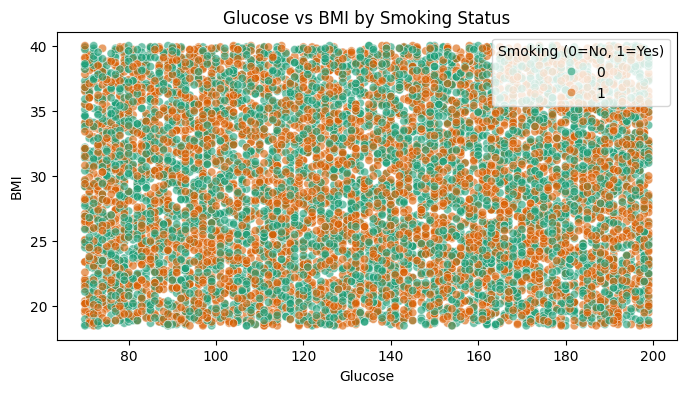

In [12]:
# Scatter plot of Glucose vs BMI with color indicating Smoking status
plt.figure(figsize=(8,4))  # Set figure size
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Smoking', palette='Dark2', alpha=0.6)
plt.title("Glucose vs BMI by Smoking Status")  # Add title
plt.xlabel("Glucose")  # Label X-axis
plt.ylabel("BMI")  # Label Y-axis
plt.legend(title="Smoking (0=No, 1=Yes)")  # Add legend
plt.show()  # Show the plot


In [13]:
# Separate the features (X) from the target variable (y)
X = df.drop('Disease', axis=1)  # Drop the target column
y = df['Disease']               # Store the target column separately

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize a scaler to standardize the feature values
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Scale training features
X_test_scaled = scaler.transform(X_test)        # Scale test features


In [14]:
# Print shape of processed datasets
print("Training feature set shape:", X_train_scaled.shape)
print("Test feature set shape:", X_test_scaled.shape)

Training feature set shape: (8000, 7)
Test feature set shape: (2000, 7)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.39      0.43       982
           1       0.51      0.61      0.55      1018

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000

Confusion Matrix:
[[381 601]
 [402 616]]
Cohen Kappa Score: -0.006933080612873788
Test Accuracy: 0.4985


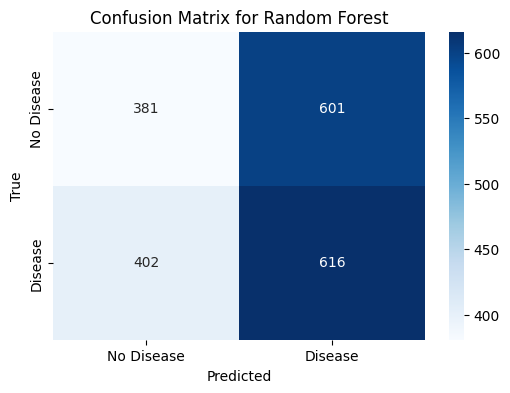

In [15]:
# Step 4: Build a RandomForest Model
rf = RandomForestClassifier(random_state=42)

# Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Setting up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Step 6: Find the best parameters and build the final model
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Build the model with the best parameters
best_rf = grid_search.best_estimator_

# Step 7: Predictions on the test set
y_pred = best_rf.predict(X_test)

# Step 8: Evaluate the model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Kappa Statistic
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen Kappa Score: {kappa}")

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")
# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.42      0.46       982
           1       0.51      0.58      0.54      1018

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Logistic Regression Confusion Matrix:
[[417 565]
 [426 592]]
Logistic Regression Cohen Kappa Score: 0.0061914971710052
Logistic Regression Test Accuracy: 0.5045


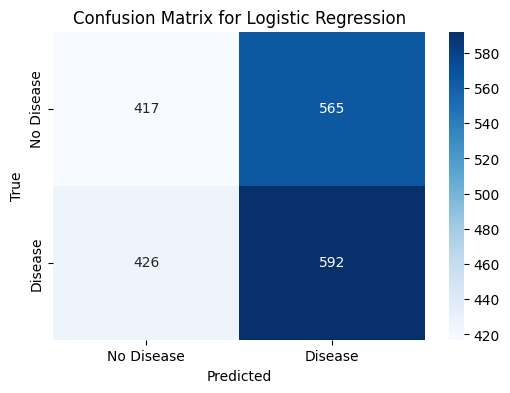

In [16]:
# Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Hyperparameter Grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers to use
}

# Hyperparameter tuning with GridSearchCV
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Best parameters for Logistic Regression
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")

# Train the model with best parameters
best_lr = grid_search_lr.best_estimator_

# Predictions and Evaluations
y_pred_lr = best_lr.predict(X_test)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Print confusion matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Kappa Score and Accuracy
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)
print(f"Logistic Regression Cohen Kappa Score: {kappa_lr}")

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {accuracy_lr}")
# Generate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       982
           1       0.52      0.52      0.52      1018

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

KNN Confusion Matrix:
[[489 493]
 [489 529]]
KNN Cohen Kappa Score: 0.017610973945682562
KNN Test Accuracy: 0.509


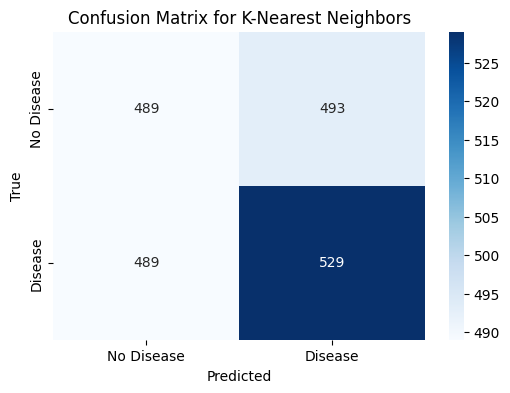

In [17]:
# KNN Model
knn = KNeighborsClassifier()

# Hyperparameter Grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Hyperparameter tuning with GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Best parameters for KNN
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# Train the model with best parameters
best_knn = grid_search_knn.best_estimator_

# Predictions and Evaluations
y_pred_knn = best_knn.predict(X_test)

# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Print confusion matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Kappa Score and Accuracy
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
print(f"KNN Cohen Kappa Score: {kappa_knn}")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Test Accuracy: {accuracy_knn}")

# Generate confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       982
           1       0.49      0.49      0.49      1018

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000

Decision Tree Confusion Matrix:
[[469 513]
 [521 497]]
Decision Tree Cohen Kappa Score: -0.03418615350763132
Decision Tree Test Accuracy: 0.483


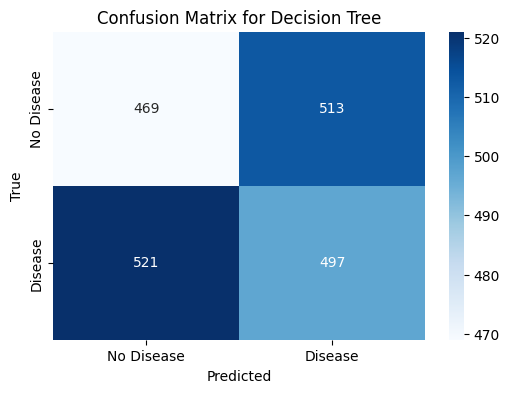

In [18]:
# Decision Tree Classifier Model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter Grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30],  # Max depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],    # Minimum number of samples required to be at a leaf node
}

# Hyperparameter tuning with GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Best parameters for Decision Tree
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

# Train the model with best parameters
best_dt = grid_search_dt.best_estimator_

# Predictions and Evaluations
y_pred_dt = best_dt.predict(X_test)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Print confusion matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Kappa Score and Accuracy
kappa_dt = cohen_kappa_score(y_test, y_pred_dt)
print(f"Decision Tree Cohen Kappa Score: {kappa_dt}")

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {accuracy_dt}")
# Generate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()